In [75]:
import cv2 as cv
import numpy as np
from PIL import Image
from colorsys import rgb_to_hsv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

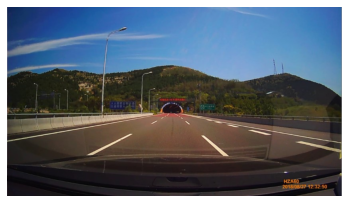

In [76]:
# Read image from JPEG file
pil_im = Image.open("lane_sample1.jpeg")
orig = np.array(pil_im)

# Resize so that standard height is 512
width = int(pil_im.width * 512 / pil_im.height)
pil_im = pil_im.resize((width , 512))

# Convert to np array
orig_img = np.array(pil_im)
plt.imshow(orig_img)
plt.axis('off')
plt.show()

In [77]:
def RGB_to_HSV(rgb):
    
    rows = rgb.shape[0]
    cols = rgb.shape[1]
    hsvImage = np.zeros((rows, cols, 3))
    
    for y in range(rows):
        for x in range(cols):
            redPrime = rgb[y,x,0] / 255
            greenPrime = rgb[y,x,1] / 255
            bluePrime = rgb[y,x,2] / 255
            cMax = max(redPrime, greenPrime, bluePrime)
            cMin = min(redPrime, greenPrime, bluePrime)
            delta = cMax - cMin
            
            #hue
            if delta == 0:
                hsvImage[y][x][0] = 0
            elif cMax == redPrime:
                hsvImage[y][x][0] = (60 * ((greenPrime - bluePrime) / delta) + 360) % 360
            elif cMax == greenPrime:
                hsvImage[y][x][0] = (60 * ((bluePrime - redPrime) / delta) + 120) % 360
            elif cMax == bluePrime:
                hsvImage[y][x][0] = (60 * ((redPrime - greenPrime) / delta) + 240) % 360
            
            #saturation
            if cMax == 0:
                hsvImage[y][x][1] = 0
            else:
                hsvImage[y][x][1] = (delta / cMax)
            
            #value
            hsvImage[y][x][2] = cMax
    
    return hsvImage

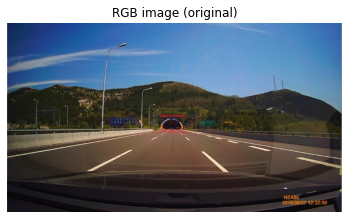

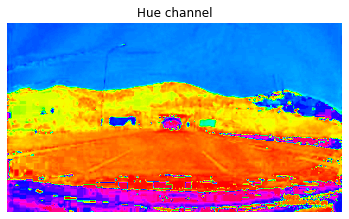

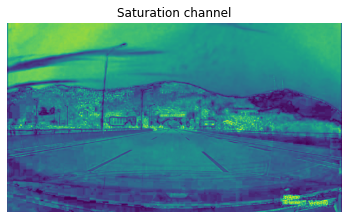

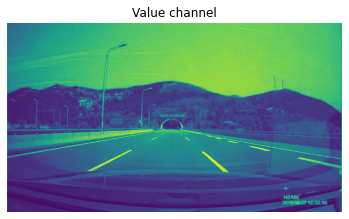

In [78]:
imHSV = RGB_to_HSV(orig_img)

hueImg = imHSV[:,:,0]
satImg = imHSV[:,:,1]
valImg = imHSV[:,:,2]

plt.imshow(orig_img)
plt.title("RGB image (original)")
plt.axis('off')
plt.show()

plt.imshow(hueImg, cmap = 'hsv')
plt.title("Hue channel")
plt.axis('off')
plt.show()

plt.imshow(satImg)
plt.title("Saturation channel")
plt.axis('off')
plt.show()

plt.imshow(valImg)
plt.title("Value channel")
plt.axis('off')
plt.show()